In [24]:
import pandas as pd
import numpy as np
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv("data.csv")
data.shape

(4856, 9)

In [3]:
#Data Cleaning 
temp=data[data['kids']<98]
data=temp[temp['educatn']<98]
data.shape

(4528, 9)

In [6]:
data.head(2)

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married,kidsNew
0,1,4,4,39,12.0,77250,2940,2,married,k1
1,2,4,6,35,12.0,12000,2040,2,divorced,k1


Number of kids are segmented as the 
k1: Number of Kids are less than or equal 2 
k2: Number of kides are greater than 2 

In [10]:
data['kidsNew']=np.where(data['kids']<=2,'k1','k2')
x=data[(data['kidsNew']=='k1') & (data['earnings']>0) ].earnings
y=data[(data['kidsNew']=='k2') & (data['earnings']>0) ].earnings

stat, p = ttest_ind(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
#Average  earnings and confidence interval for the families less than or equal 2 kids 
print(np.mean(x))
print(st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x)))

20900.018439108062
(20208.801278639647, 21591.235599576477)


In [14]:
#Average  earnings and confidence interval for the families greater than 2 kids 
print(np.mean(y))
print(st.t.interval(0.95, len(y)-1, loc=np.mean(y), scale=st.sem(y)))

14959.685891748004
(14238.234814396603, 15681.136969099405)


Hypothesis Test 

H0: Average earnings for group k1
H1: Average earnings for group k2  

Decision : According to the 2 -sample t test it can be seen that p_value is less then 0.05. Therefore we reject h0 at 0.05 significance level 

Conclusion: Average earnings according to the 2 groups have significant difference 

95% confidence interval for Average earnings(per year) for group k1 (20208.801278639647, 21591.235599576477)

95% confidence interval for Average earnings(per year) other group k2 (14238.234814396603, 15681.136969099405)



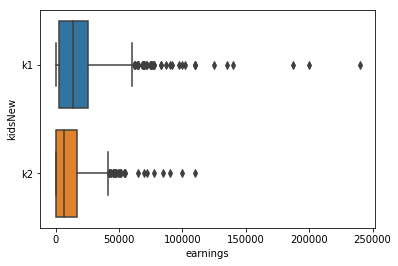

In [27]:
#Visualization of earnings  according to the 2 groups  
sns.boxplot( x=data['earnings'], y=data["kidsNew"] )
plt.show()

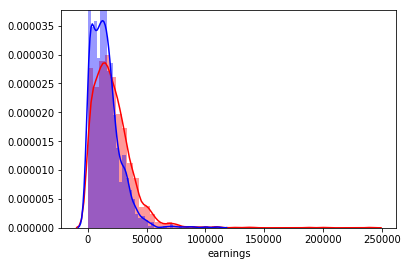

In [29]:
# Method 1: on the same Axis
sns.distplot( x , color="red", label="k1-earnings")
sns.distplot( y , color="blue", label="k2-earnings")